<a href="https://colab.research.google.com/github/dinasoffa/Unsubervised_ML/blob/main/Credit_Card_Dataset_for_Clustering_Cover_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

# read data

In [ ]:
data_path = '/content/CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [ ]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# deal with missing value


In [ ]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].median()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].median()

In [ ]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


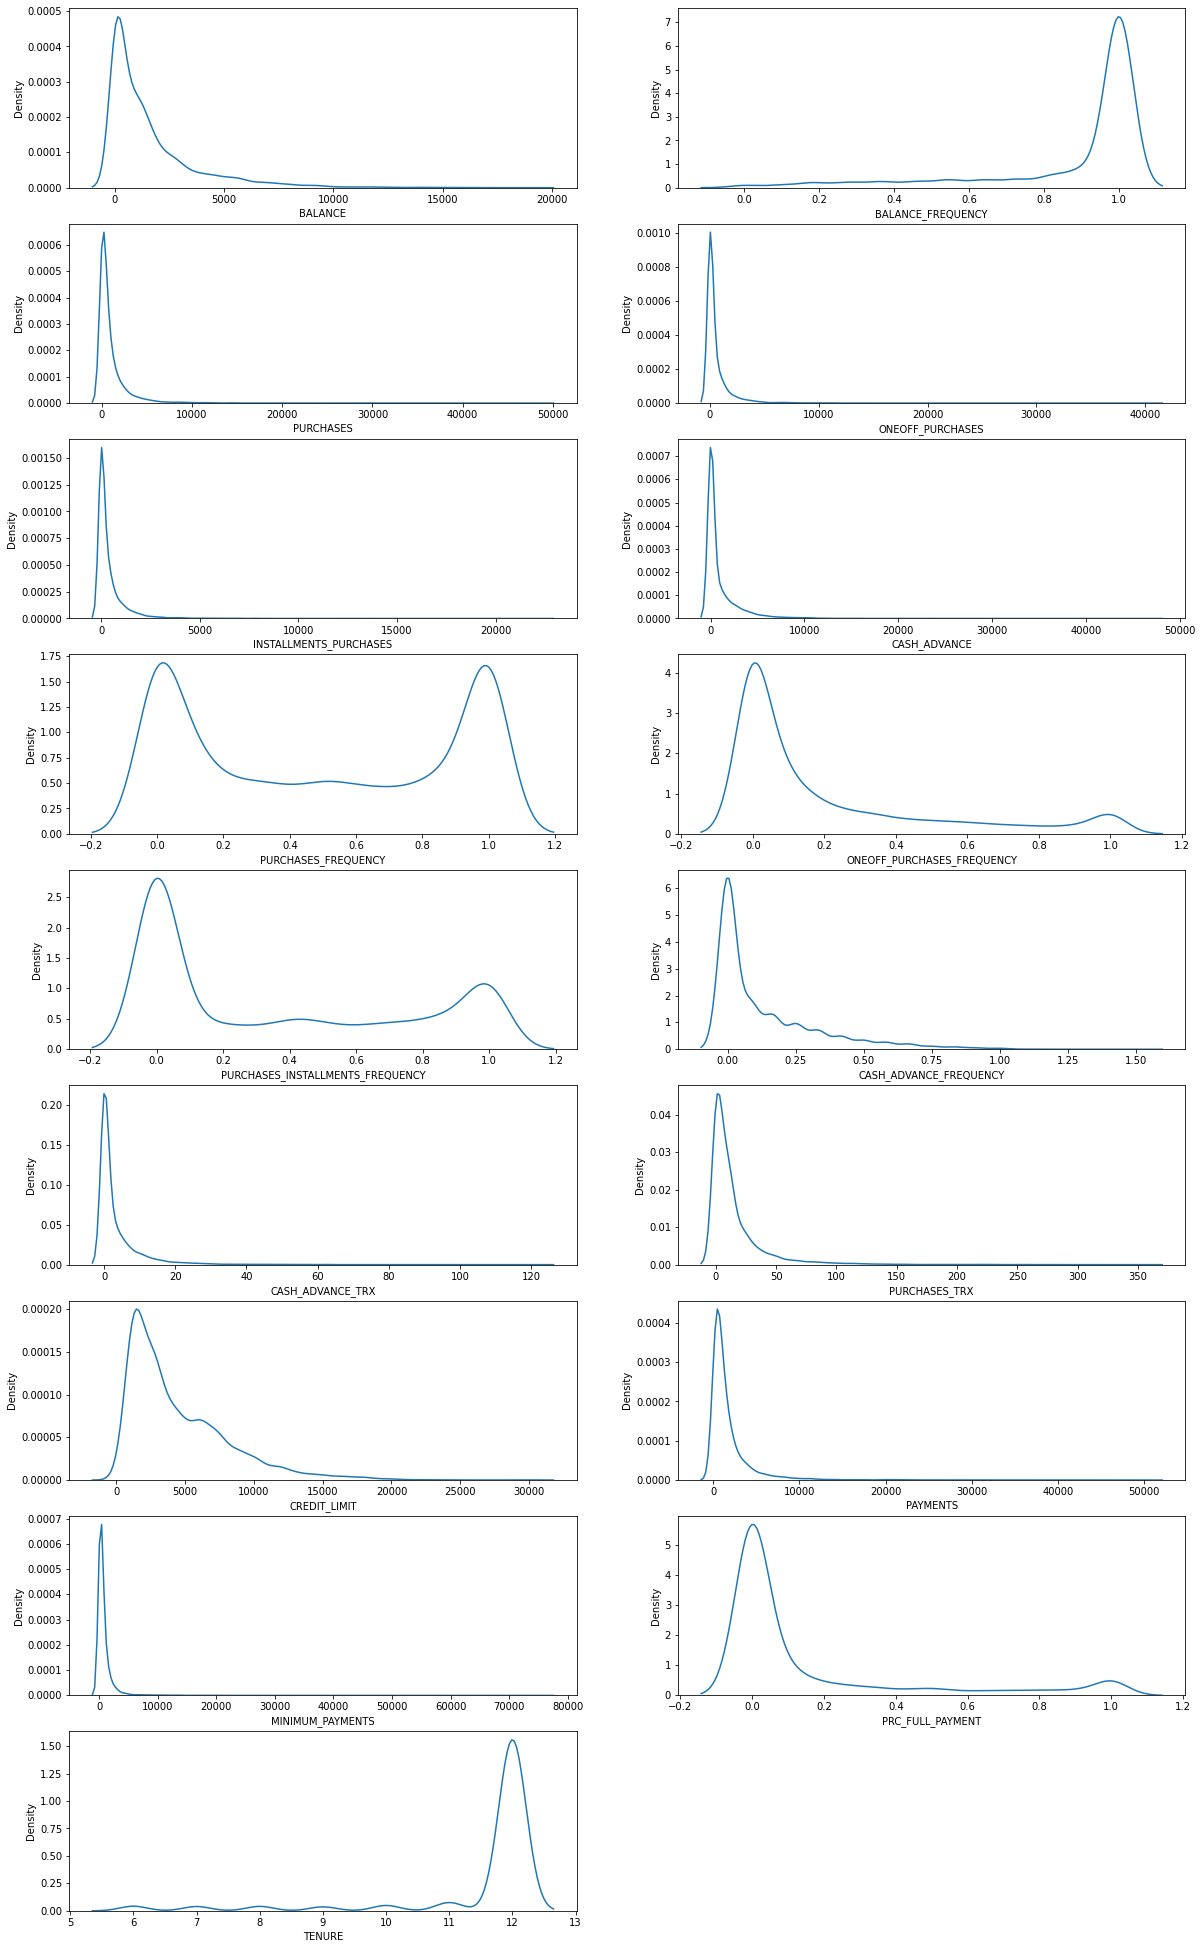

In [ ]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()


# Dealing with skewness

In [ ]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
        'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','PURCHASES','TENURE']

In [ ]:
for col in cols:
    df[col] = np.log(1 + df[col])

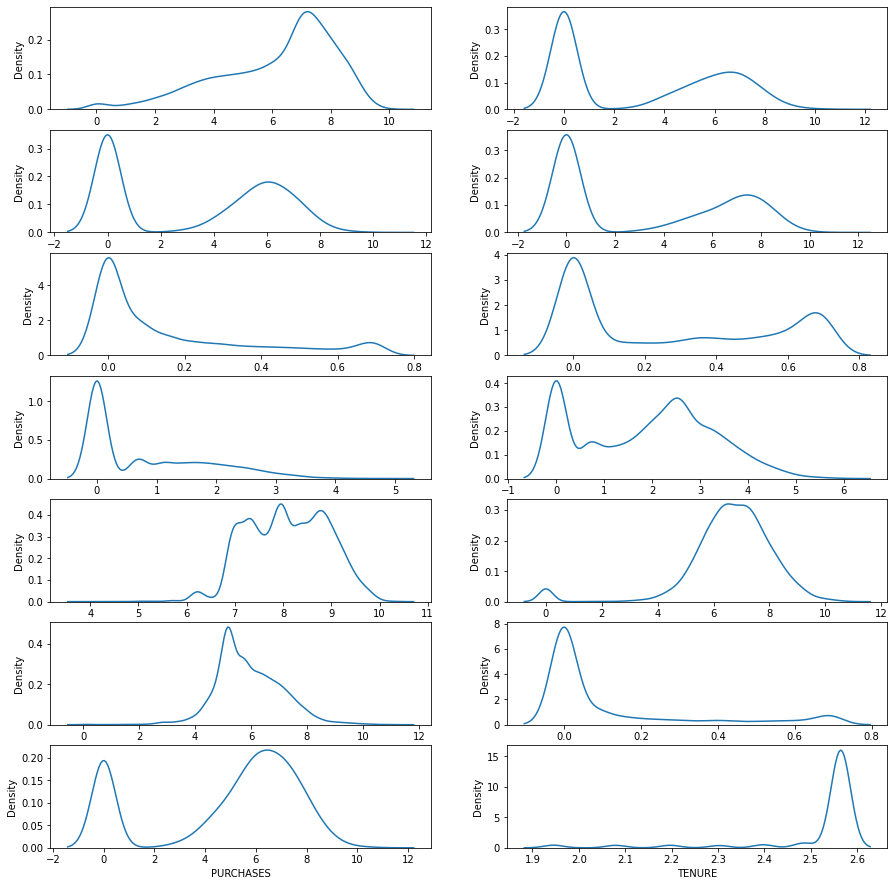

In [ ]:
plt.figure(figsize=(15,20))
for i, col in enumerate(cols):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
plt.show()

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949
3,7.419183,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.080042,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,5.747301,0.000000,2.564949
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949


# pca

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_red = pca.fit_transform(df)


In [ ]:
df_new=pd.DataFrame(X_red)

In [ ]:
df_new.head()

,0,1
0,0.998915,-5.611600
1,-8.973823,1.540886
2,2.630656,1.325334
3,-0.322770,2.963792
4,-1.247113,-2.721171


[345870.53863736824, 165382.89172522473, 96907.5598261899, 55270.64456060109, 43908.38014362859, 34906.227330981535, 30454.847736656997, 26603.04020193876, 23781.53607994668, 21118.827493852797]


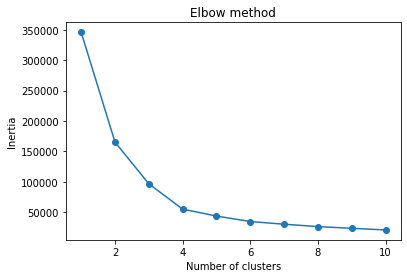

In [ ]:
from sklearn.cluster import KMeans
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_new)
    inertias.append(kmeans.inertia_)


print(inertias)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

In [ ]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=23)
kmeans.fit(X_red)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))

Silhoutte score of our model is 0.5357274909609013


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

# AgglomerativeClustering with pca

In [ ]:
for i in range(2,11):
  
  cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
  cluster_label=cluster.fit_predict(df_new)
  silhouette_avg = silhouette_score(df_new, cluster_label)
  print("For n_clusters =", i,
            "The average silhouette_score is :", silhouette_avg)
  
  

For n_clusters = 2 The average silhouette_score is : 0.49634594425611955
For n_clusters = 3 The average silhouette_score is : 0.5099414241798161
For n_clusters = 4 The average silhouette_score is : 0.49122009415851287
For n_clusters = 5 The average silhouette_score is : 0.4669984884561995
For n_clusters = 6 The average silhouette_score is : 0.46758779012154844
For n_clusters = 7 The average silhouette_score is : 0.4212043832706281
For n_clusters = 8 The average silhouette_score is : 0.3940767461008126
For n_clusters = 9 The average silhouette_score is : 0.39137656121403747
For n_clusters = 10 The average silhouette_score is : 0.37957521340134326


# AgglomerativeClustering without pca

In [ ]:
for i in range(2,11):

  cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
  cluster_label=cluster.fit_predict(df)
  silhouette_avg = silhouette_score(df, cluster_label)
  print("For n_clusters =", i,
            "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3686086460291076
For n_clusters = 3 The average silhouette_score is : 0.36903367592615266
For n_clusters = 4 The average silhouette_score is : 0.389810075572243
For n_clusters = 5 The average silhouette_score is : 0.4115938630099148
For n_clusters = 6 The average silhouette_score is : 0.4269377820258746
For n_clusters = 7 The average silhouette_score is : 0.44695090508150015
For n_clusters = 8 The average silhouette_score is : 0.39656649352120354
For n_clusters = 9 The average silhouette_score is : 0.3212175800208356
For n_clusters = 10 The average silhouette_score is : 0.3089833701754129


# GaussianMixture with pca

In [ ]:
for i in range(2,11):

  gm = GaussianMixture(i) 
  cluster_label=cluster.fit_predict(df_new)
  silhouette_avg = silhouette_score(df_new, cluster_label)
  print("For n_clusters =", i,
            "The average silhouette_score is :", silhouette_avg)



For n_clusters = 2 The average silhouette_score is : 0.37957521340134326
For n_clusters = 3 The average silhouette_score is : 0.37957521340134326
For n_clusters = 4 The average silhouette_score is : 0.37957521340134326
For n_clusters = 5 The average silhouette_score is : 0.37957521340134326
For n_clusters = 6 The average silhouette_score is : 0.37957521340134326
For n_clusters = 7 The average silhouette_score is : 0.37957521340134326
For n_clusters = 8 The average silhouette_score is : 0.37957521340134326
For n_clusters = 9 The average silhouette_score is : 0.37957521340134326
For n_clusters = 10 The average silhouette_score is : 0.37957521340134326


# GaussianMixture without pca

In [ ]:
for i in range(2,11):

  gm = GaussianMixture(i) 
  cluster_label=cluster.fit_predict(df)
  silhouette_avg = silhouette_score(df, cluster_label)
  print("For n_clusters =", i,
            "The average silhouette_score is :", silhouette_avg)



For n_clusters = 2 The average silhouette_score is : 0.3089833701754129
For n_clusters = 3 The average silhouette_score is : 0.3089833701754129
For n_clusters = 4 The average silhouette_score is : 0.3089833701754129
For n_clusters = 5 The average silhouette_score is : 0.3089833701754129
For n_clusters = 6 The average silhouette_score is : 0.3089833701754129
For n_clusters = 7 The average silhouette_score is : 0.3089833701754129
For n_clusters = 8 The average silhouette_score is : 0.3089833701754129
For n_clusters = 9 The average silhouette_score is : 0.3089833701754129
For n_clusters = 10 The average silhouette_score is : 0.3089833701754129


# best result with using DSCAN

For epsonlle = 55 and the minuium point = 10 The average silhouette_score is : 0.3087865843755194
[ 0  1 -1]
131


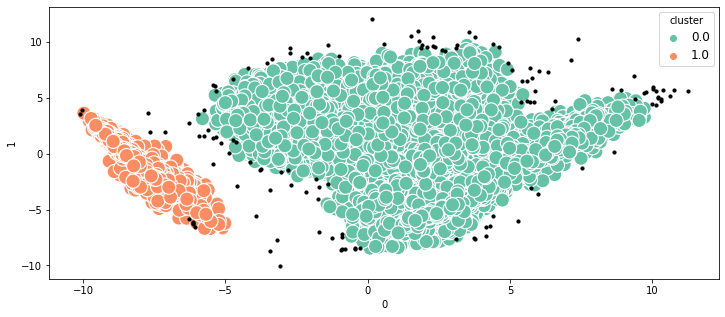

In [ ]:
count=0
scan = DBSCAN(eps =0.55, min_samples = 10).fit(df_new)
db_scan=df_new.copy() 
db_scan["cluster"]=scan.labels_
un=db_scan["cluster"].unique()
avg=silhouette_score(df, db_scan["cluster"]) 
print("For epsonlle =", 55,"and the minuium point =",10 ,"The average silhouette_score is :", avg)
print(un)
for i in db_scan["cluster"]:
  if i==-1:
    count+=1
print(count)
#vistualize
outliers = db_scan[db_scan['cluster']==-1]
fig,(axes) = plt.subplots(1,1,figsize=(12,5))
axes.legend()
sns.scatterplot(df_new[0], df_new[1],data=db_scan[db_scan['cluster']!=-1], hue='cluster', ax=axes, palette='Set2', legend='full', s=200)
axes.scatter(outliers[0], outliers[1], s=10, label='outliers', c="k")
plt.setp(axes.get_legend().get_texts(), fontsize='12')
plt.show()   

# conclusion 
### DBSCAN give the best result with use min_samples=10 and eps=0.55 as it give two classes and 131 points noise